In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import glob
import pandas as pd
%matplotlib inline 

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [152]:
values = pd.read_csv("./data/values.csv")
values.drop('id', axis=1, inplace = True)
values.rename(columns = {'place':'place_id'}, inplace = True)
locations = pd.read_csv("./data/locations.csv")
locations.rename(columns = {'id':'place_id'}, inplace = True)
df = pd.merge(values,locations,
              how='left',
              on=['place_id'])
df.head(5)

,place_id,time,so2,no2,pm10,pm2_5,short_name,eng_name
0,1,10/17/12 0:00,0.011,0.079,0.121,0.076,ds,Dongsi
1,1,10/17/12 1:00,0.003,0.016,0.012,0.005,ds,Dongsi
2,1,10/17/12 2:00,0.003,0.019,0.010,0.007,ds,Dongsi
3,1,10/17/12 3:00,0.003,0.019,0.010,0.006,ds,Dongsi
4,1,10/17/12 4:00,0.003,0.024,0.005,0.003,ds,Dongsi


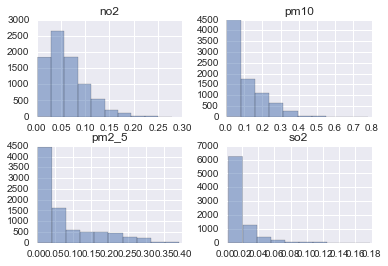

In [201]:
### overall distribution 
values[["so2", "no2", "pm10", "pm2_5"]].hist(alpha=0.5);




In [154]:
values_time = values[["time","so2", "no2", "pm10", "pm2_5"]].groupby(['time'], sort=False)\
.mean()
values_time.reset_index(inplace=True)
values_time.head(5)

,time,so2,no2,pm10,pm2_5
0,10/17/12 0:00,0.011462,0.057538,0.090808,0.051154
1,10/17/12 1:00,0.003560,0.015800,0.010240,0.004346
2,10/17/12 2:00,0.003882,0.017235,0.016059,0.004885
3,10/17/12 3:00,0.004360,0.025440,0.018160,0.004731
4,10/17/12 4:00,0.005412,0.030118,0.024000,0.006654


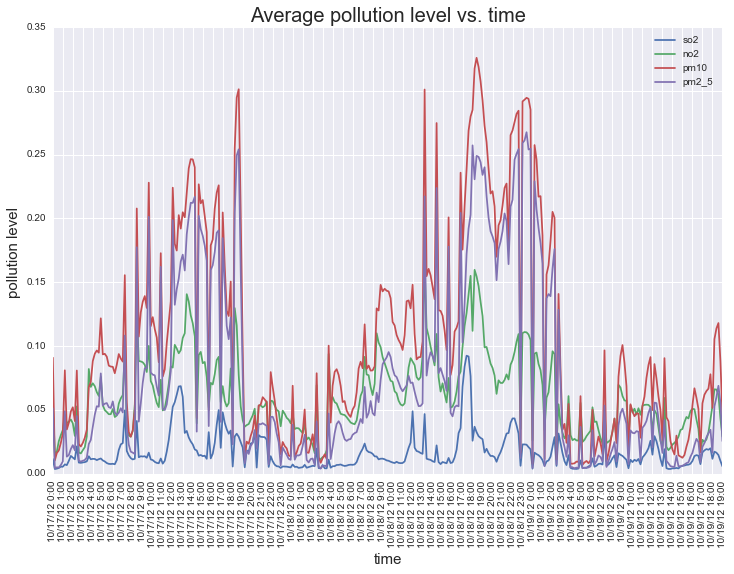

In [163]:
fix, ax = plt.subplots(1,1, figsize = (12,8))
time = values_time['time']
ax.set_xticks(np.arange(0,len(time),5))
ax.set_xticklabels(time, rotation = 90)
ax.set_xlabel("time", fontsize = 15)
ax.set_ylabel("pollution level ", fontsize = 15)
ax.set_title("Average pollution level vs. time", fontsize = 20)
labels = ["so2", "no2", "pm10", "pm2_5"]
for label in labels:
    plt.plot(values_time[label], label=label)

plt.legend()
plt.show()


In [177]:
values_place = values[["place_id","so2", "no2", "pm10", "pm2_5"]].groupby(['place_id'], sort=False)\
.mean()
values_place.reset_index(inplace=True)
values_place = pd.merge(values_place,locations,
              how='left',
              on=['place_id'])
values_place.head(5)

,place_id,so2,no2,pm10,pm2_5,short_name,eng_name
0,1,0.019297,0.078191,0.121070,0.095839,ds,Dongsi
1,2,0.014024,0.056268,0.111143,0.086274,tt,Temple of Heaven
2,3,0.020024,0.074723,0.120735,0.084914,gy,Guanyuan
3,4,0.014285,0.069664,0.117536,0.090107,wsxg,Wanshou West Palace
4,5,0.018564,0.078594,0.121252,0.092634,atzx,Olympic Park


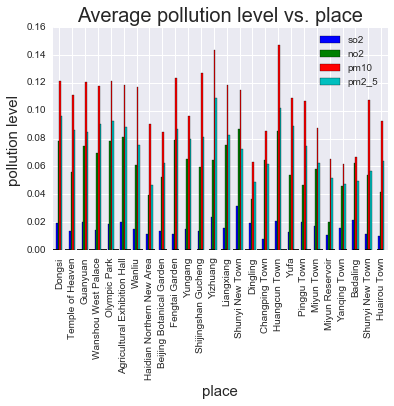

In [200]:
place = values_place['eng_name']
values_place.head(5)
ax = values_place[["so2", "no2", "pm10", "pm2_5"]].plot(kind='bar');
ax.set_xlabel("place", fontsize = 15);
ax.set_ylabel("pollution level ", fontsize = 15);
ax.set_title("Average pollution level vs. place", fontsize = 20);
ax.set_xticks(np.arange(len(place)));
ax.set_xticklabels(place, rotation = 90);



# plt.legend()
# plt.show()

